In [ ]:
# 1. Load the wine dataset

In [208]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

from sklearn.cluster import KMeans
ds = sklearn.datasets.load_wine(return_X_y=False, as_frame=False)

ix = [i for i,d in enumerate(ds['feature_names']) if d =='od280/od315_of_diluted_wines']
ds['feature_names'][ix[0]] = 'ratio_of_diluted_wines'

X = ds['data']
df = pd.DataFrame(X, columns = ds['feature_names'])

In [ ]:
# 2. Create the dataset that we can use for unsupervised learning, that means without the target data.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# 3. Create a data frame for that data (the dataset without the labels (targets)).

In [28]:
X = ds['data']
df = pd.DataFrame(X, columns = ds['feature_names'])
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   ratio_of_diluted_wines  proline  
0                    3.92   1065.0  
1                    3.40   1050.0  
2                    3.17   1185.0  
3                    3.45   1480.0  
4                    2.93    735.0

In [36]:
# 4. Visualize the dataset and investigate: How many clusters would you suspect be suitable for this dataset just by looking at the 
# visualization?

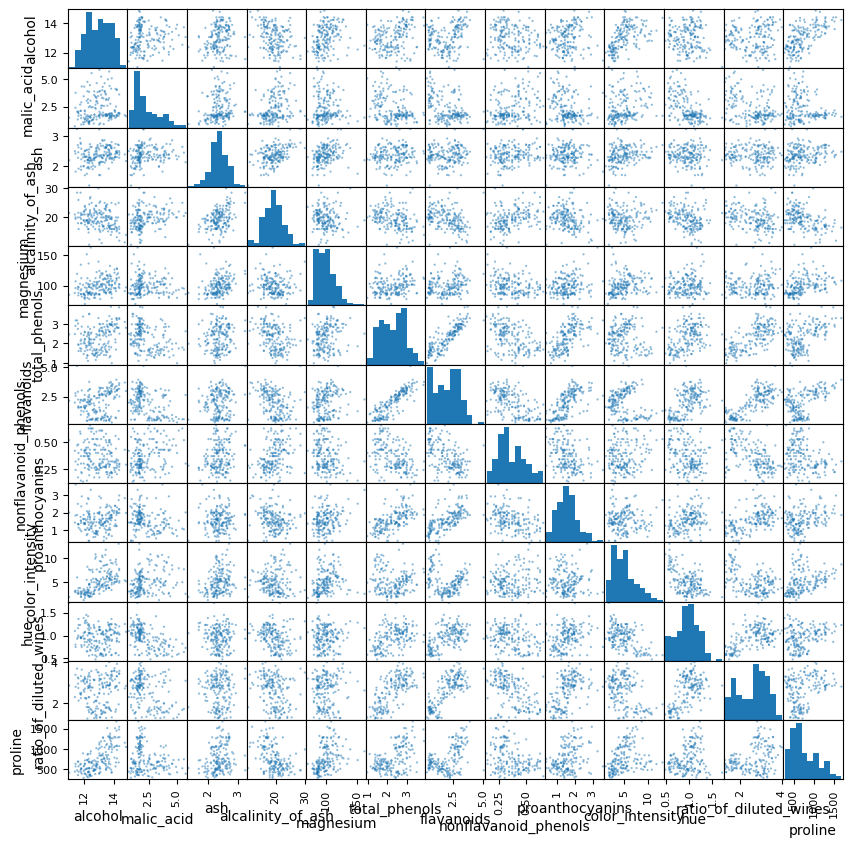

In [51]:
visual = pd.plotting.scatter_matrix(df, figsize = [10,10], s = 10)

well as I know there are 3 wines, I would asume that 3 clusters should work

In [ ]:
# 5. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? 
# Explain why?

In [79]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  ratio_of_diluted_wines      proline  
count       178.000000  178.000000              178.000000   178.000000  
mean          5.058090    0.957449                2.611685   746.893258  
std           2.318286    0.228572                0.709990   314.907474  
min           1.280000    0.480000                1.270000   278.000000  
25%           3.220000    0.782500                1.937500   500.500000  
50%           4.690000    0.965000                2.780000   673.500000  
75%           6.200000    1.120000                3.170000   985.000000  
max          13.000000    1.710000                4.000000  1680.000000

In [58]:
for n in df:
    print(f'{n}: {df[n].std()/np.mean(df[n]):.4f}')

alcohol: 0.0624
malic_acid: 0.4782
ash: 0.1159
alcalinity_of_ash: 0.1713
magnesium: 0.1432
total_phenols: 0.2727
flavanoids: 0.4922
nonflavanoid_phenols: 0.3439
proanthocyanins: 0.3598
color_intensity: 0.4583
hue: 0.2387
ratio_of_diluted_wines: 0.2719
proline: 0.4216


unsure how to deterimene such importance, as i dont think mean and std makes an diffrence, as you can always normalize.

but i asusme that magnesium has one out lise 

In [ ]:
# 6. Use the Elbow method to identify a suitable number of clusters

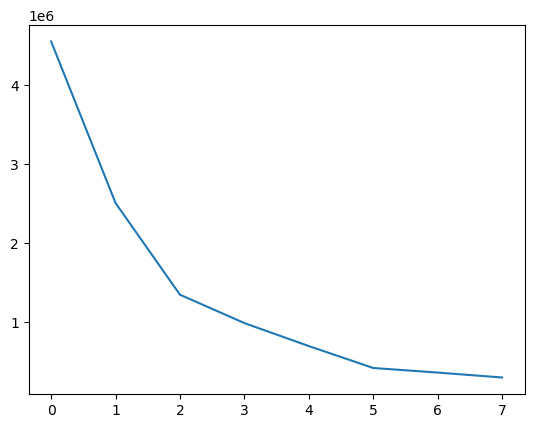

In [153]:
inta = [np.mean([KMeans(n_clusters = i).fit(X).inertia_ for _ in range(4)]) for i in range(2,10)]
plt.plot(inta)

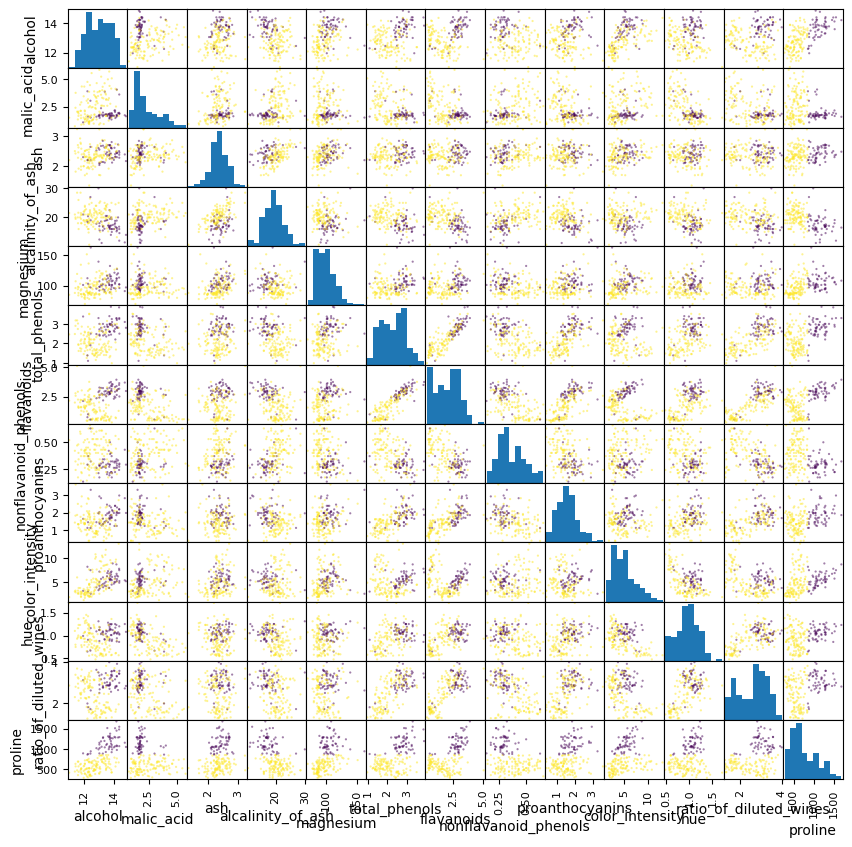

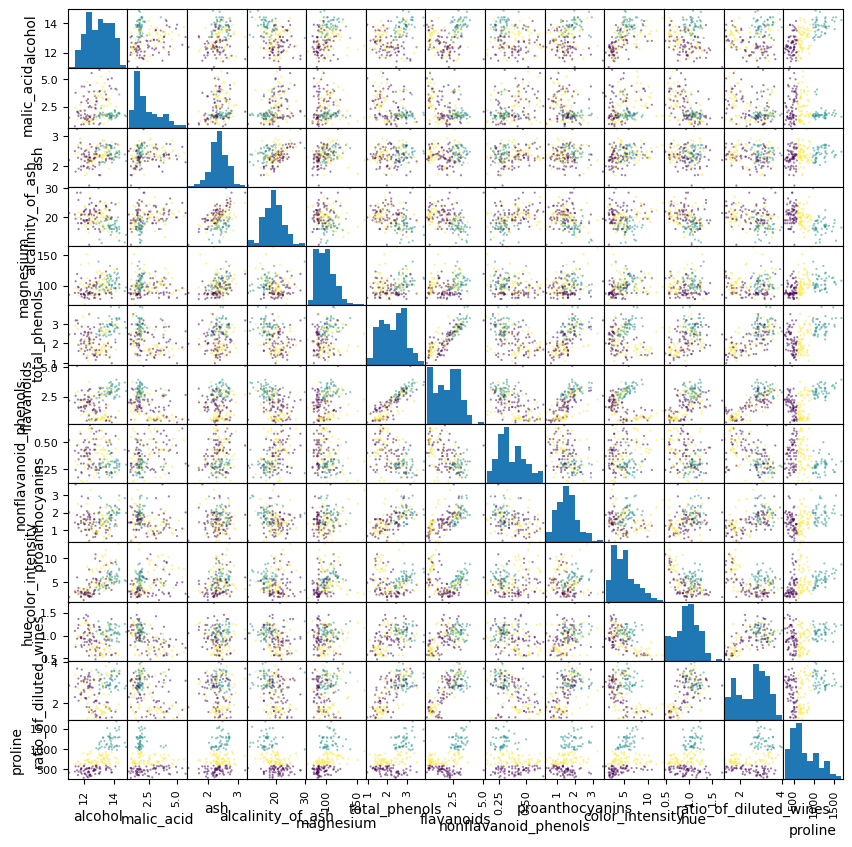

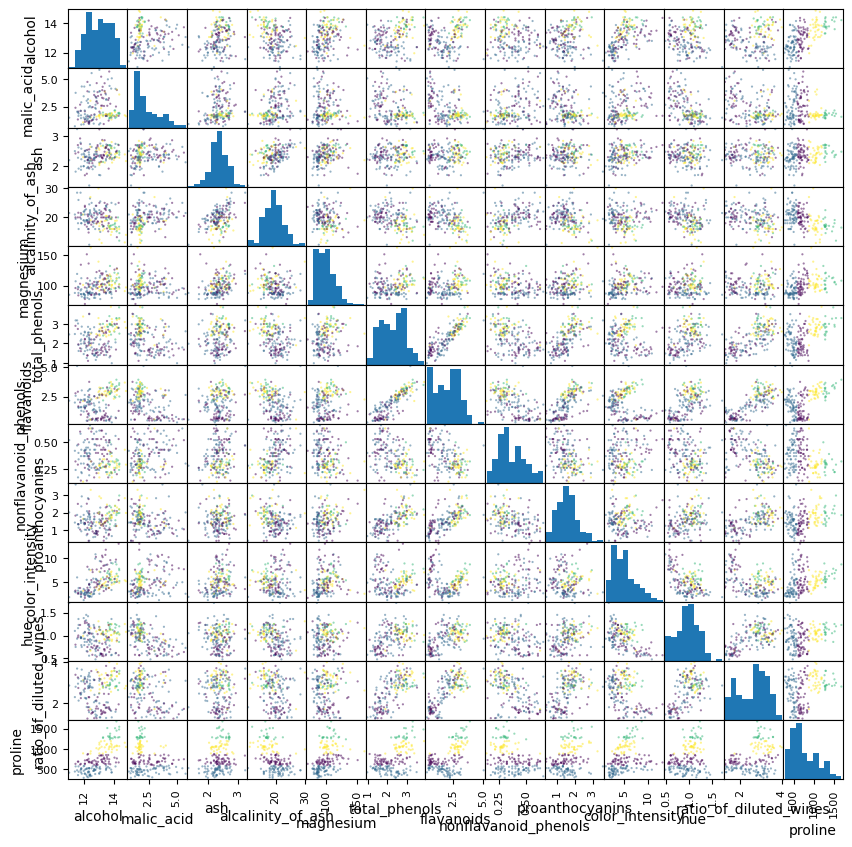

In [158]:
_ = [(pd.plotting.scatter_matrix(df, figsize = [10,10], c = KMeans(n_clusters = i).fit(X).labels_, s = 10), plt.show()) for i in range(2,5)]

In [ ]:
# 6. (i). What number of clusters would you suggest based on the Elbow method?

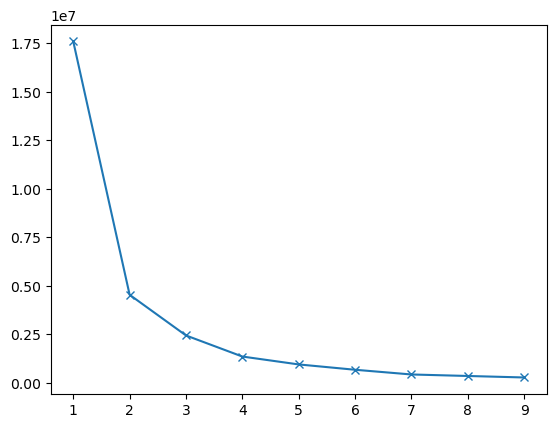

In [11]:
inta = [np.mean([KMeans(n_clusters = i).fit(X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')

In [ ]:
# 7. Normalize the dataset

In [39]:
normalized_X = preprocessing.normalize(X)
norm_df = pd.DataFrame(normalized_X, columns = ds['feature_names'])

In [45]:
norm_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.019950    0.003711    0.003644           0.031124    0.151541   
std      0.007321    0.002499    0.001409           0.014671    0.054081   
min      0.008428    0.000944    0.001473           0.007739    0.064147   
25%      0.013548    0.001684    0.002359           0.017615    0.109775   
50%      0.018984    0.003174    0.003468           0.030036    0.146777   
75%      0.024783    0.004981    0.004506           0.040010    0.183082   
max      0.041106    0.014852    0.007305           0.069703    0.297958   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.003444    0.002973              0.000581         0.002396   
std         0.001543    0.001802              0.000327         0.001249   
min         0.001255    0.000637              0.000145         0.000554   
25%         0.002385    0.001746              0.000277         0.001515   
50%         0.002946    0.002721              0.000514         0.002030   
75%         0.003886    0.003551              0.000833         0.003040   
max         0.008404    0.010560              0.002008         0.007469   

       color_intensity         hue  ratio_of_diluted_wines     proline  
count       178.000000  178.000000              178.000000  178.000000  
mean          0.007342    0.001477                0.003993    0.986018  
std           0.003843    0.000736                0.001979    0.010073  
min           0.002241    0.000579                0.001675    0.951812  
25%           0.004612    0.000970                0.002535    0.981687  
50%           0.005981    0.001232                0.003384    0.988441  
75%           0.008853    0.001834                0.004870    0.993564  
max           0.021876    0.004727                0.010858    0.997835

In [ ]:
# 9. Visualize the normalized data and investigate: How many clusters would you suspect be suitable for this 
# normalized dataset just by looking at the visualization?

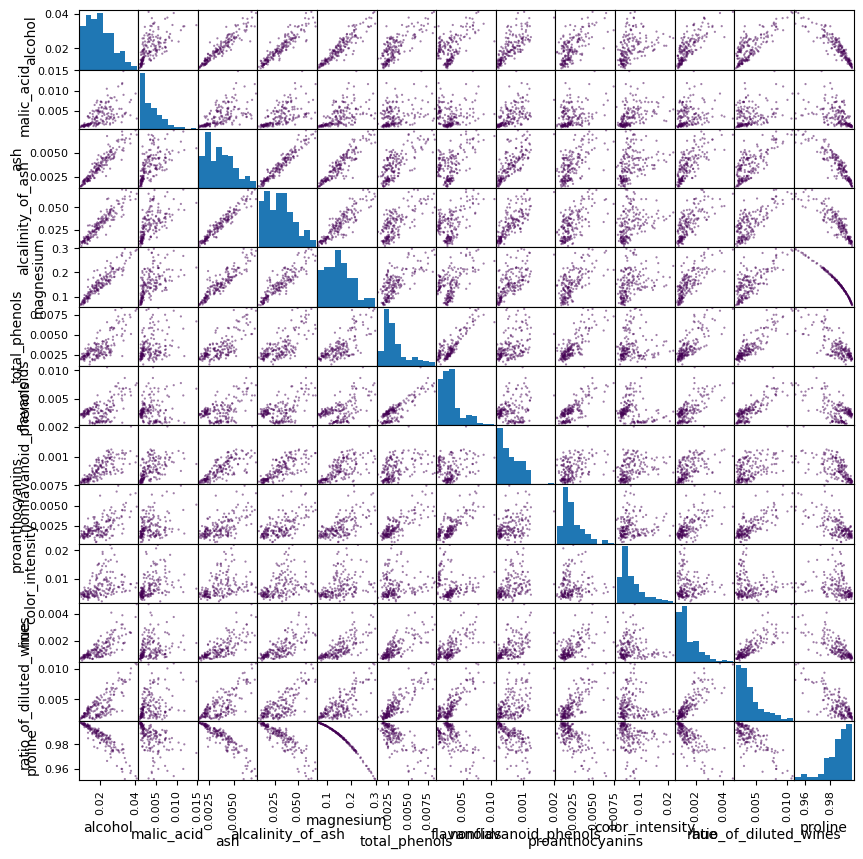

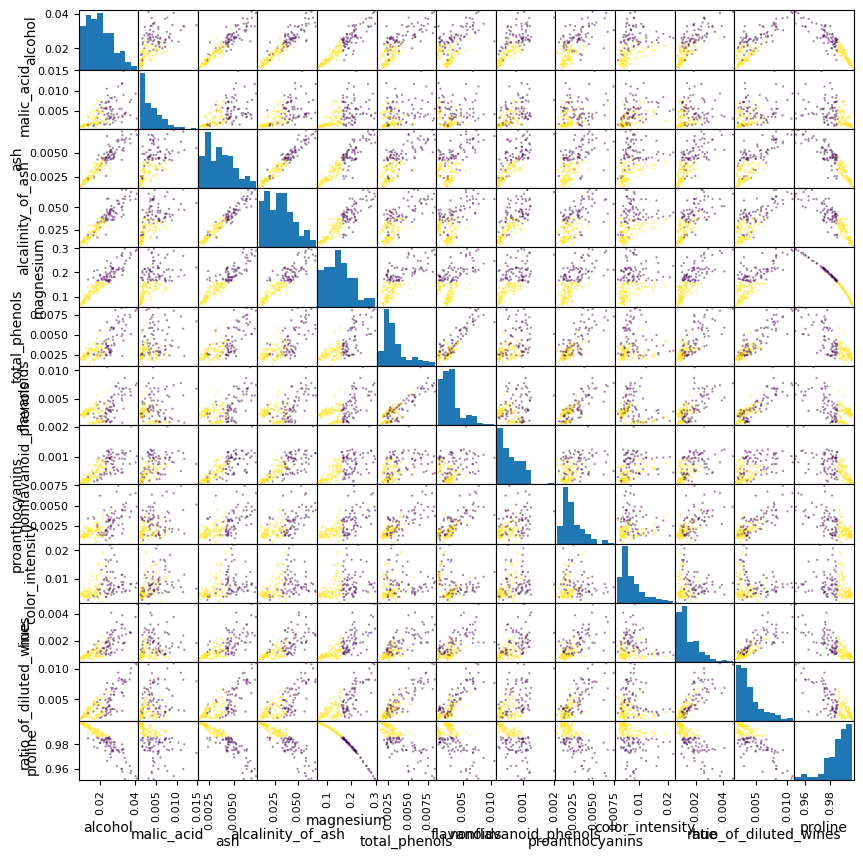

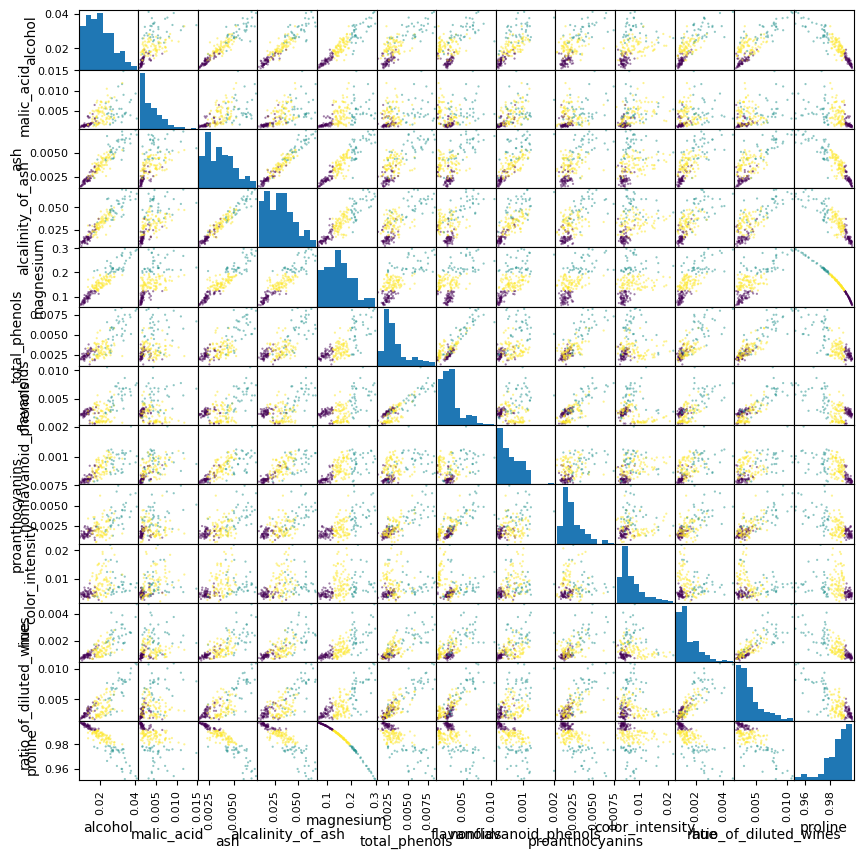

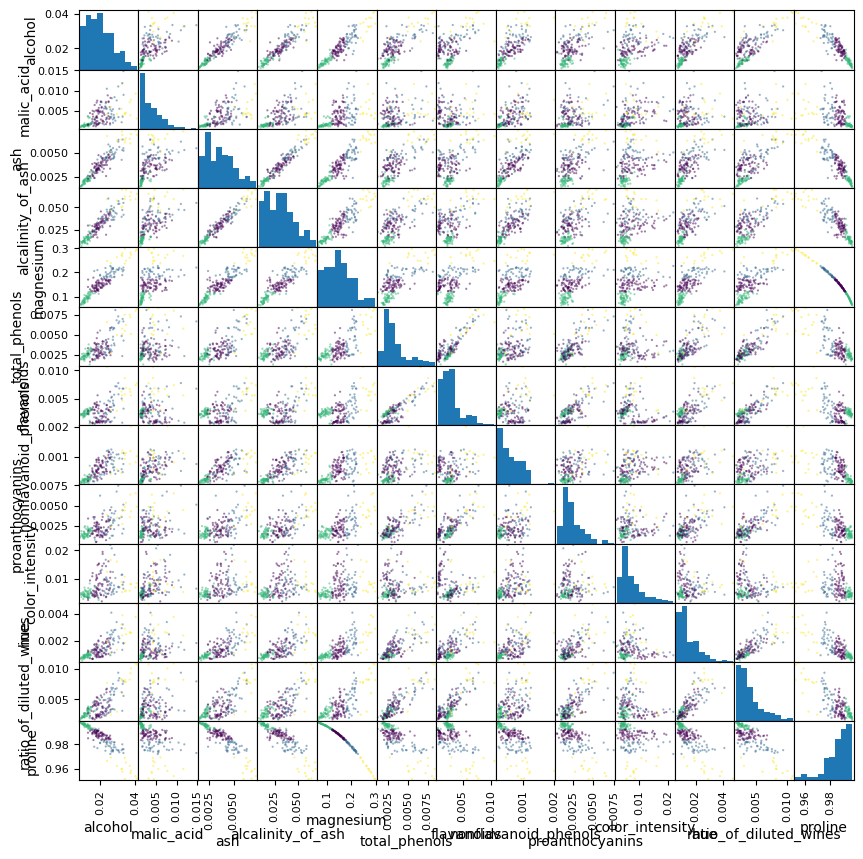

In [44]:
normalized_X = preprocessing.normalize(X)
norm_df = pd.DataFrame(normalized_X, columns = ds['feature_names'])

_ = [(pd.plotting.scatter_matrix(norm_df, figsize = [10,10], c = KMeans(n_clusters = i).fit(normalized_X).labels_, s = 10), plt.show()) for i in range(1,5)]

In [ ]:
# 10. Use the describe function and investigate: What features in the dataset might be of more or less importance for the clustering? 
# Explain why?

In [180]:
norm_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.019950    0.003711    0.003644           0.031124    0.151541   
std      0.007321    0.002499    0.001409           0.014671    0.054081   
min      0.008428    0.000944    0.001473           0.007739    0.064147   
25%      0.013548    0.001684    0.002359           0.017615    0.109775   
50%      0.018984    0.003174    0.003468           0.030036    0.146777   
75%      0.024783    0.004981    0.004506           0.040010    0.183082   
max      0.041106    0.014852    0.007305           0.069703    0.297958   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.003444    0.002973              0.000581         0.002396   
std         0.001543    0.001802              0.000327         0.001249   
min         0.001255    0.000637              0.000145         0.000554   
25%         0.002385    0.001746              0.000277         0.001515   
50%         0.002946    0.002721              0.000514         0.002030   
75%         0.003886    0.003551              0.000833         0.003040   
max         0.008404    0.010560              0.002008         0.007469   

       color_intensity         hue  ratio_of_diluted_wines     proline  
count       178.000000  178.000000              178.000000  178.000000  
mean          0.007342    0.001477                0.003993    0.986018  
std           0.003843    0.000736                0.001979    0.010073  
min           0.002241    0.000579                0.001675    0.951812  
25%           0.004612    0.000970                0.002535    0.981687  
50%           0.005981    0.001232                0.003384    0.988441  
75%           0.008853    0.001834                0.004870    0.993564  
max           0.021876    0.004727                0.010858    0.997835

In [63]:
for n in norm_df:
    print(f'{n}: {norm_df[n].std()/np.mean(norm_df[n]):.4f}')

alcohol: 0.3670
malic_acid: 0.6733
ash: 0.3865
alcalinity_of_ash: 0.4714
magnesium: 0.3569
total_phenols: 0.4480
flavanoids: 0.6063
nonflavanoid_phenols: 0.5630
proanthocyanins: 0.5214
color_intensity: 0.5234
hue: 0.4982
ratio_of_diluted_wines: 0.4954
proline: 0.0102


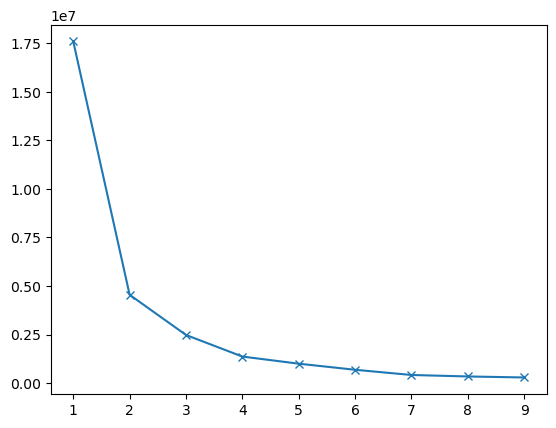

In [184]:
inta = [np.mean([KMeans(n_clusters = i).fit(X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')

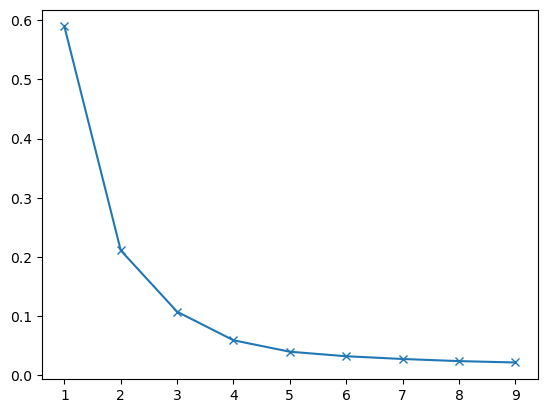

In [183]:
inta = [np.mean([KMeans(n_clusters = i).fit(normalized_X).inertia_ for _ in range(10)]) for i in range(1,10)]
plt.plot(range(1,10),inta, marker='x')

In [ ]:
# 13. Build two more cluster models: model_3 and modle_3N, with 3 clusters each and based on the original and the normalized dataset 
# respectively.

In [194]:
model_3 = KMeans(n_clusters = 3).fit(X)
modle_3N = KMeans(n_clusters = 3).fit(normalized_X)

In [ ]:
# 14. Compare the clustering of wine by their chemical features with the original classification by winery 
# (the original target values in the dataset).

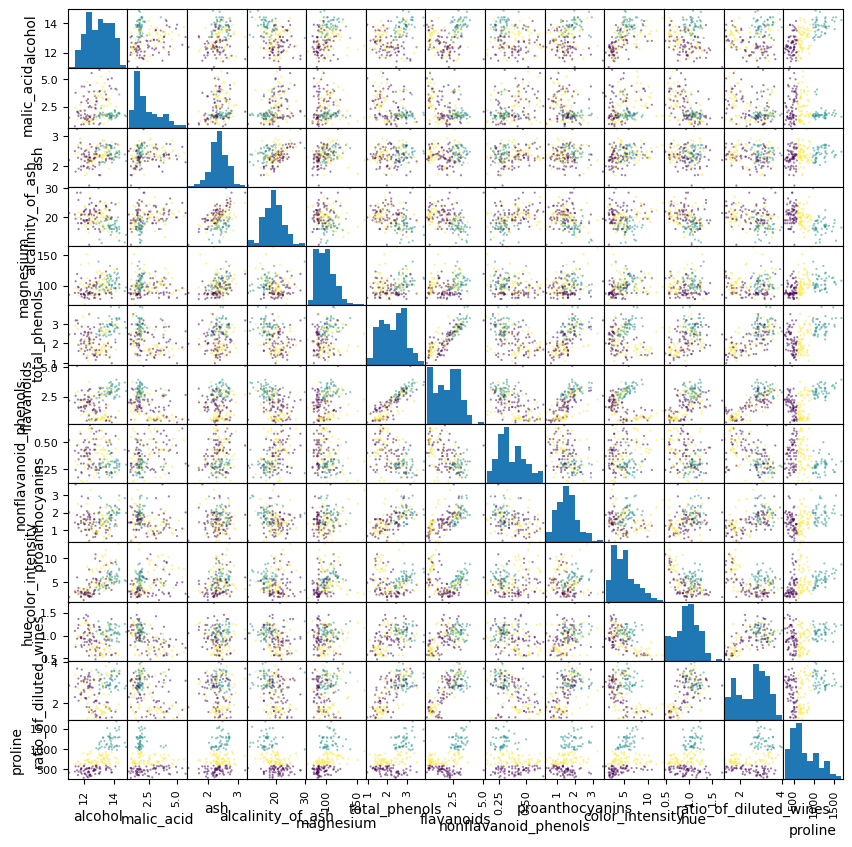

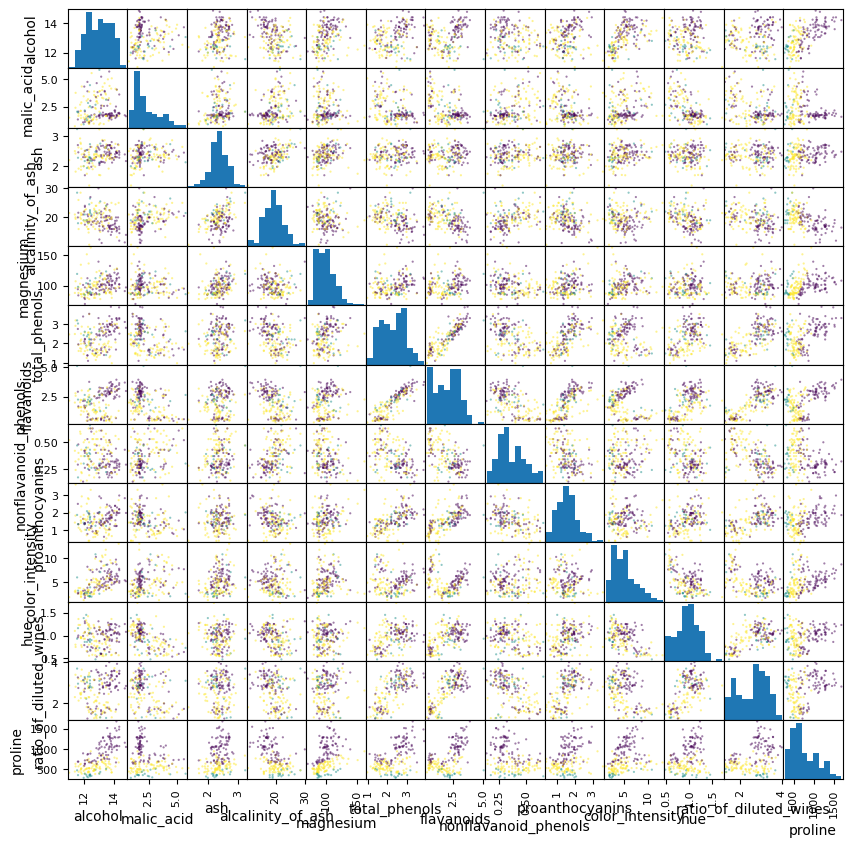

In [215]:
_ = [(pd.plotting.scatter_matrix(df, figsize = [10,10], c = KMeans(n_clusters = 3).fit(i).labels_, s = 10), plt.show()) for i in [X, normalized_X]]

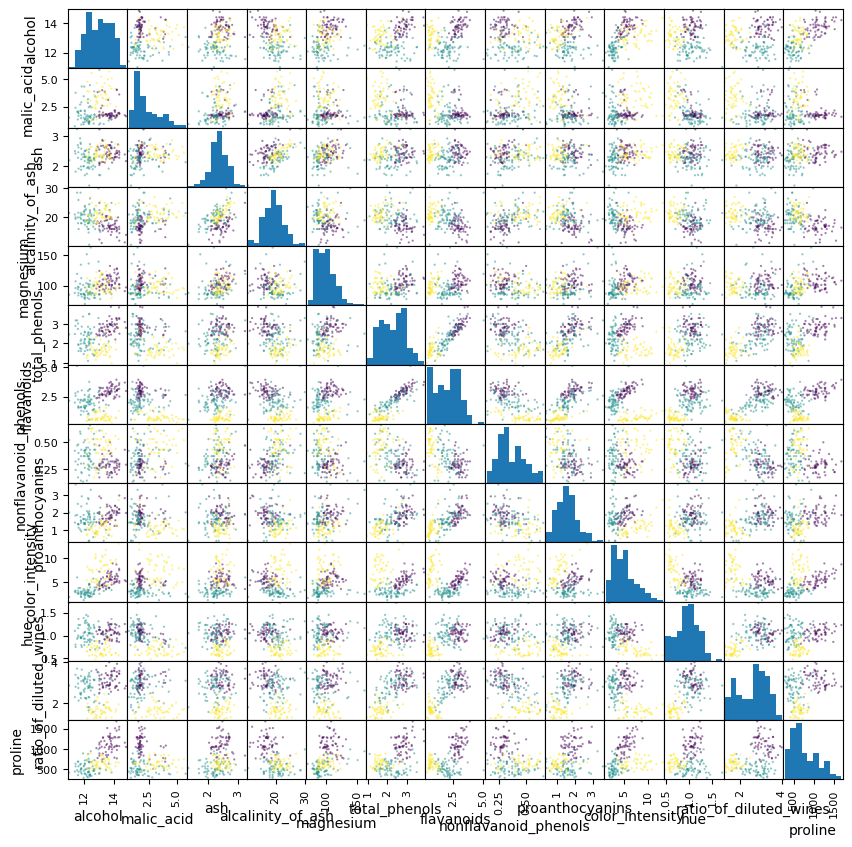

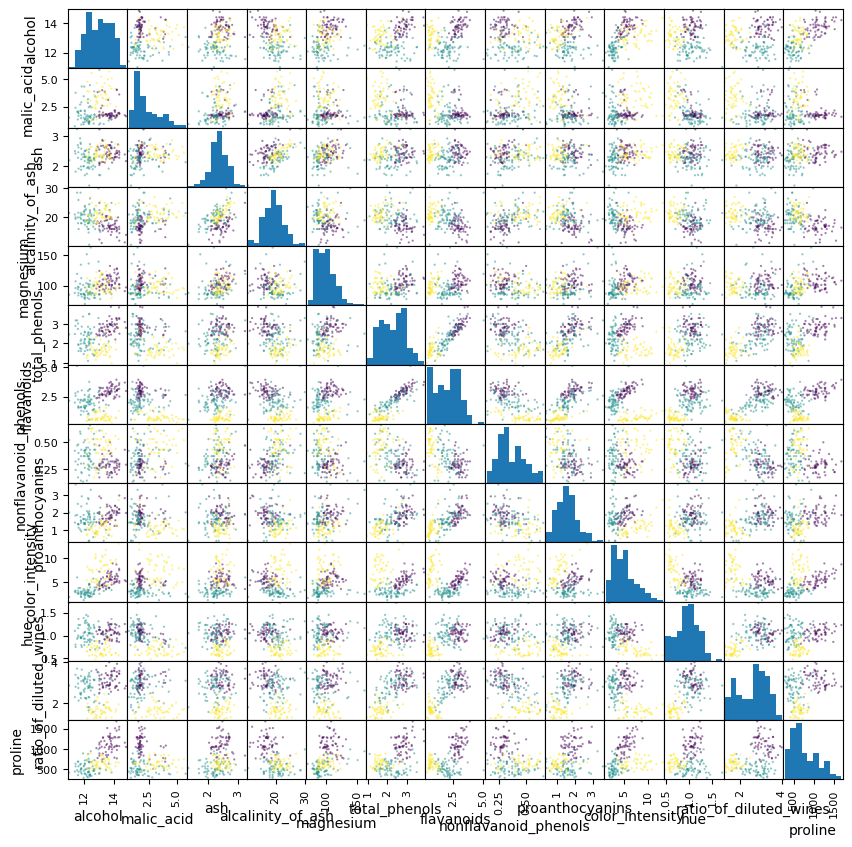

In [220]:
_ = [(pd.plotting.scatter_matrix(df, figsize = [10,10], c = ds['target'], s = 10), plt.show()) for i in [X, normalized_X]]

In [259]:
from sklearn.metrics import accuracy_score

print([accuracy_score(ds['target'], l) for l in [KMeans(n_clusters = 3).fit(i).labels_ for i in [X, normalized_X]]])


[0.06741573033707865, 0.11797752808988764]
